In [1]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [6]:
df.index

RangeIndex(start=0, stop=48204, step=1)

In [7]:
df.shape

(48204, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              48204 non-null  object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [9]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


In [11]:
df.isnull().sum()

traffic_volume         0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
dtype: int64

In [24]:
df.duplicated().sum()

17

In [26]:
df.drop_duplicates()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00
...,...,...,...,...,...,...,...,...,...
48199,3543,None,283.45,0.0,0.0,75,Clouds,broken clouds,30-09-2018 19:00
48200,2781,None,282.76,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 20:00
48201,2159,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,30-09-2018 21:00
48202,1450,None,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00


In [27]:
df["holiday"].value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [28]:
df["weather_main"].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [29]:
df["weather_description"].value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              48204 non-null  object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [32]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       48204 non-null  int64         
 1   holiday              48204 non-null  object        
 2   temp                 48204 non-null  float64       
 3   rain_1h              48204 non-null  float64       
 4   snow_1h              48204 non-null  float64       
 5   clouds_all           48204 non-null  int64         
 6   weather_main         48204 non-null  object        
 7   weather_description  48204 non-null  object        
 8   date_time            48204 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [34]:
df.head(2)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00


In [35]:
df['date'] = df['date_time'].dt.date
df['time'] = df['date_time'].dt.time

In [36]:
df.head(2)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,date,time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00,2012-02-10,09:00:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00,2012-02-10,10:00:00


In [37]:
df.drop("date_time", axis=1, inplace=True)

In [38]:
df.head(2)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date,time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10,09:00:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10,10:00:00


In [41]:
sns.set(style="whitegrid")

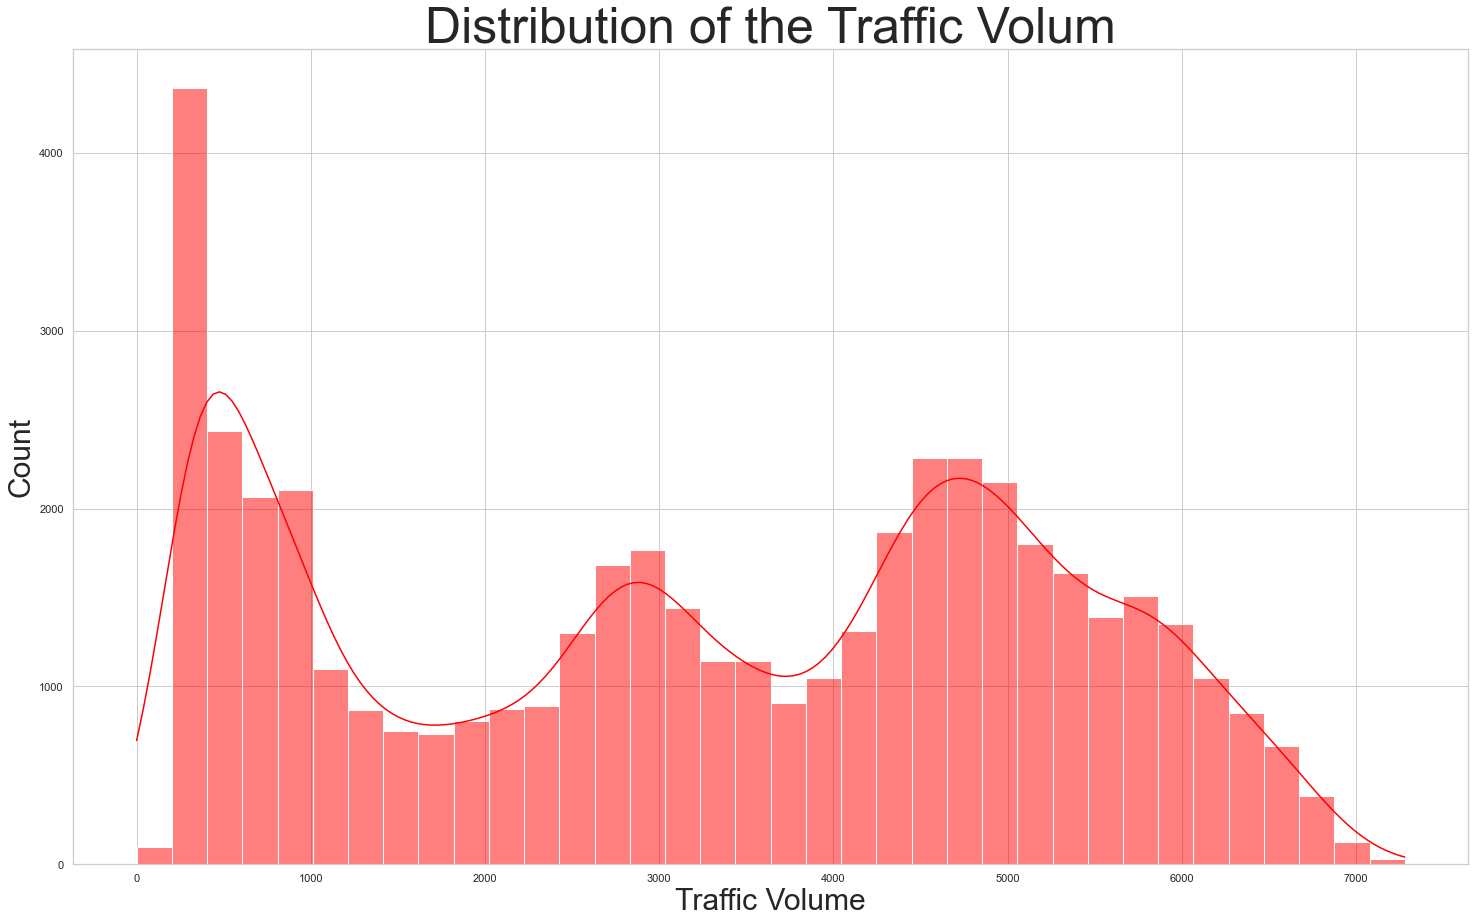

In [51]:
plt.figure(figsize=(25,15))
sns.histplot(df["traffic_volume"], color="red", kde=True)
plt.title("Distribution of the Traffic Volum", fontsize=50)
plt.xlabel("Traffic Volume",fontsize=30)
plt.ylabel("Count", fontsize=30)
plt.show()

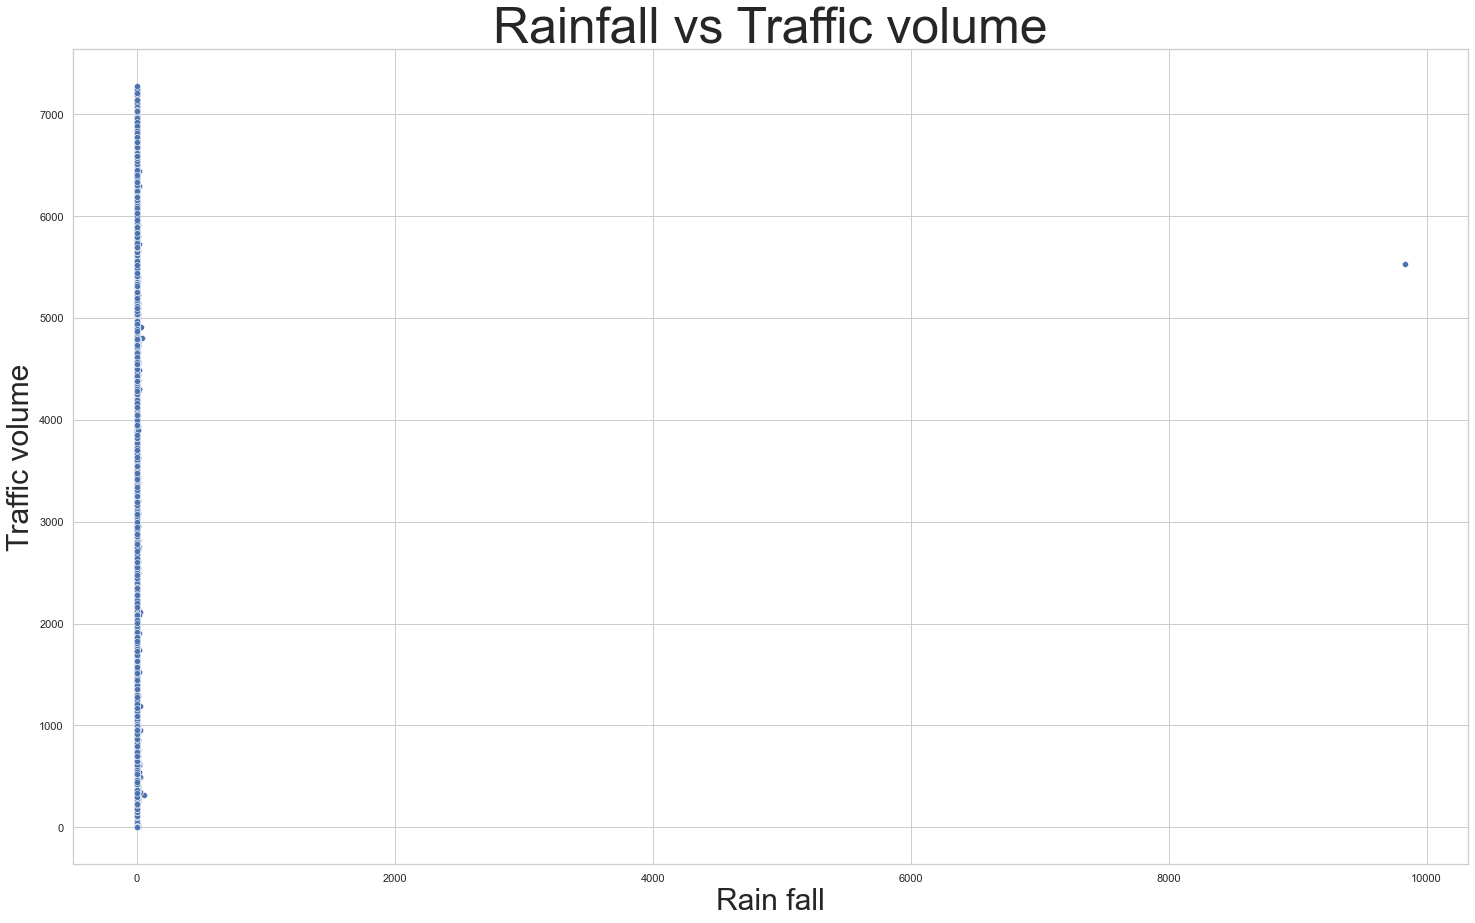

In [55]:
plt.figure(figsize=(25,15))
sns.scatterplot(x="rain_1h", y="traffic_volume", data=df)
plt.title("Rainfall vs Traffic volume", fontsize=50)
plt.xlabel("Rain fall", fontsize=30)
plt.ylabel("Traffic volume", fontsize=30)
plt.show()

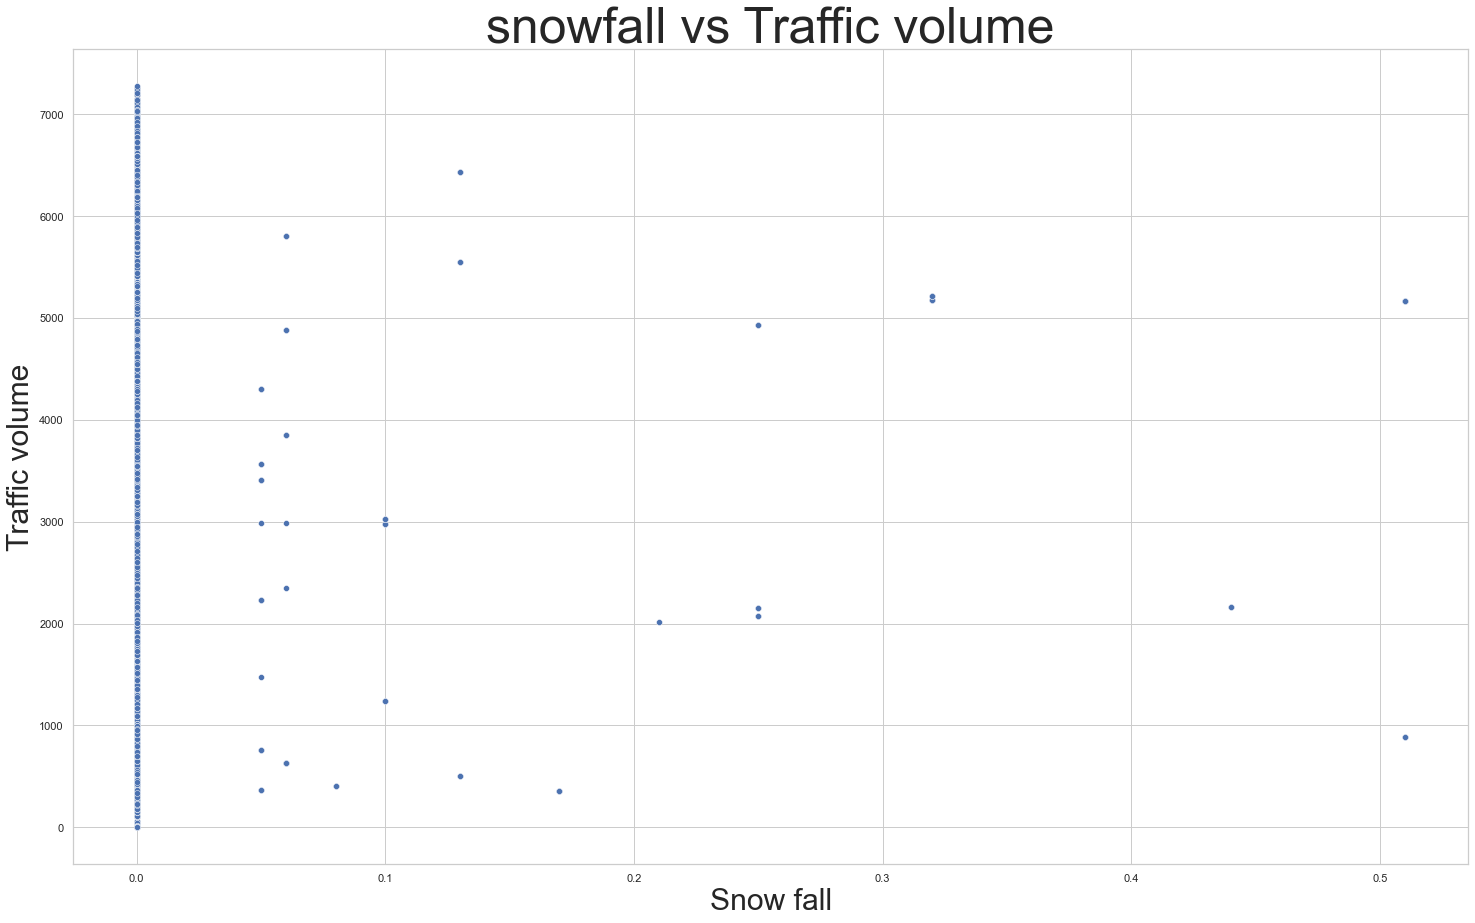

In [56]:
plt.figure(figsize=(25,15))
sns.scatterplot(x="snow_1h", y="traffic_volume", data=df)
plt.title("snowfall vs Traffic volume", fontsize=50)
plt.xlabel("Snow fall", fontsize=30)
plt.ylabel("Traffic volume", fontsize=30)
plt.show()

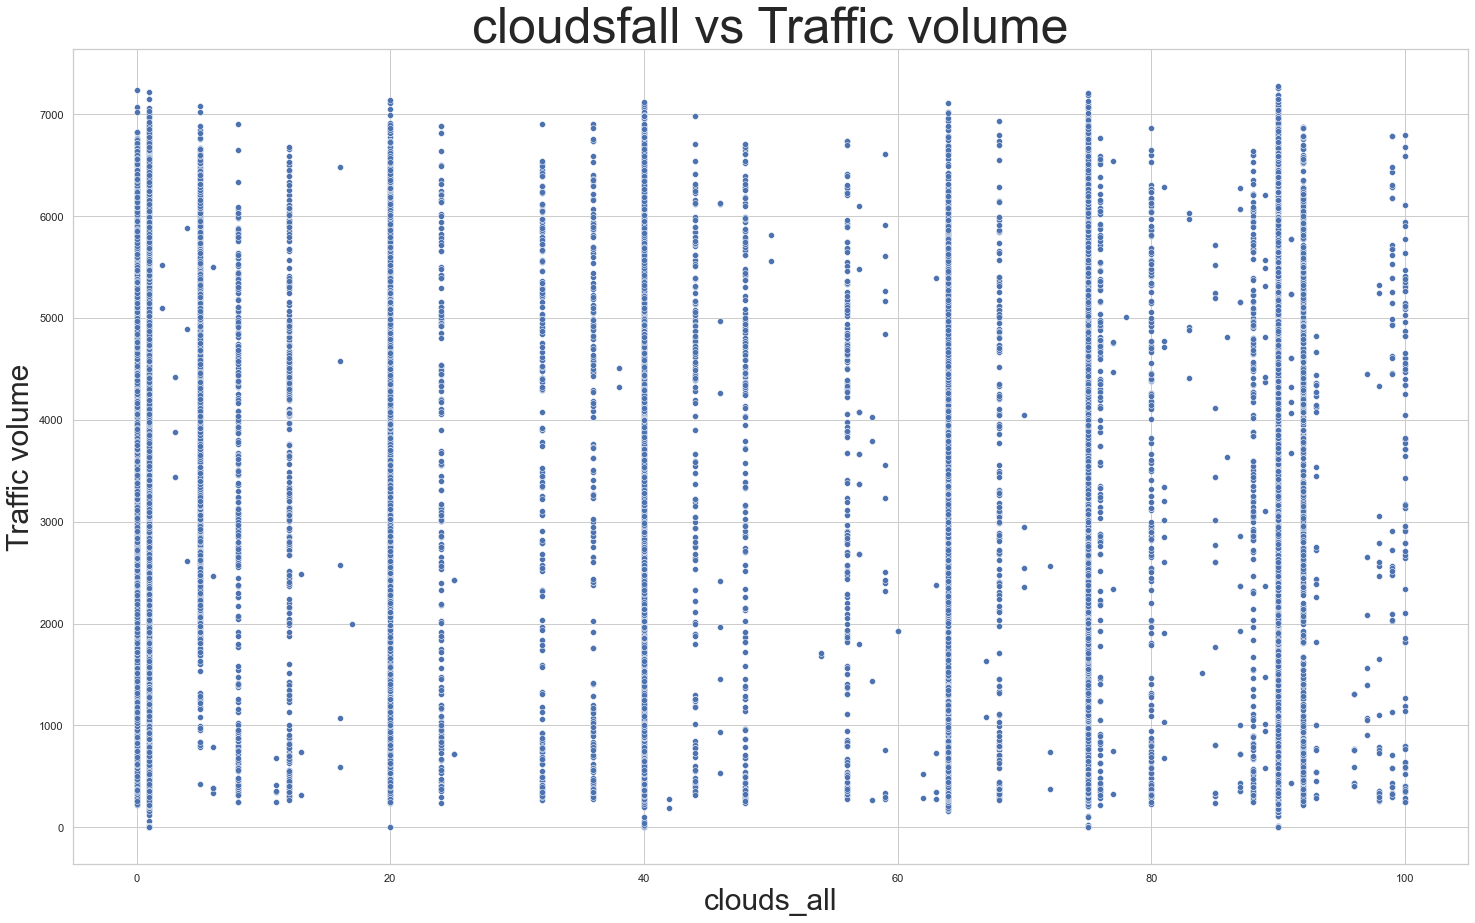

In [57]:
plt.figure(figsize=(25,15))
sns.scatterplot(x="clouds_all", y="traffic_volume", data=df)
plt.title("cloudsfall vs Traffic volume", fontsize=50)
plt.xlabel("clouds_all", fontsize=30)
plt.ylabel("Traffic volume", fontsize=30)
plt.show()

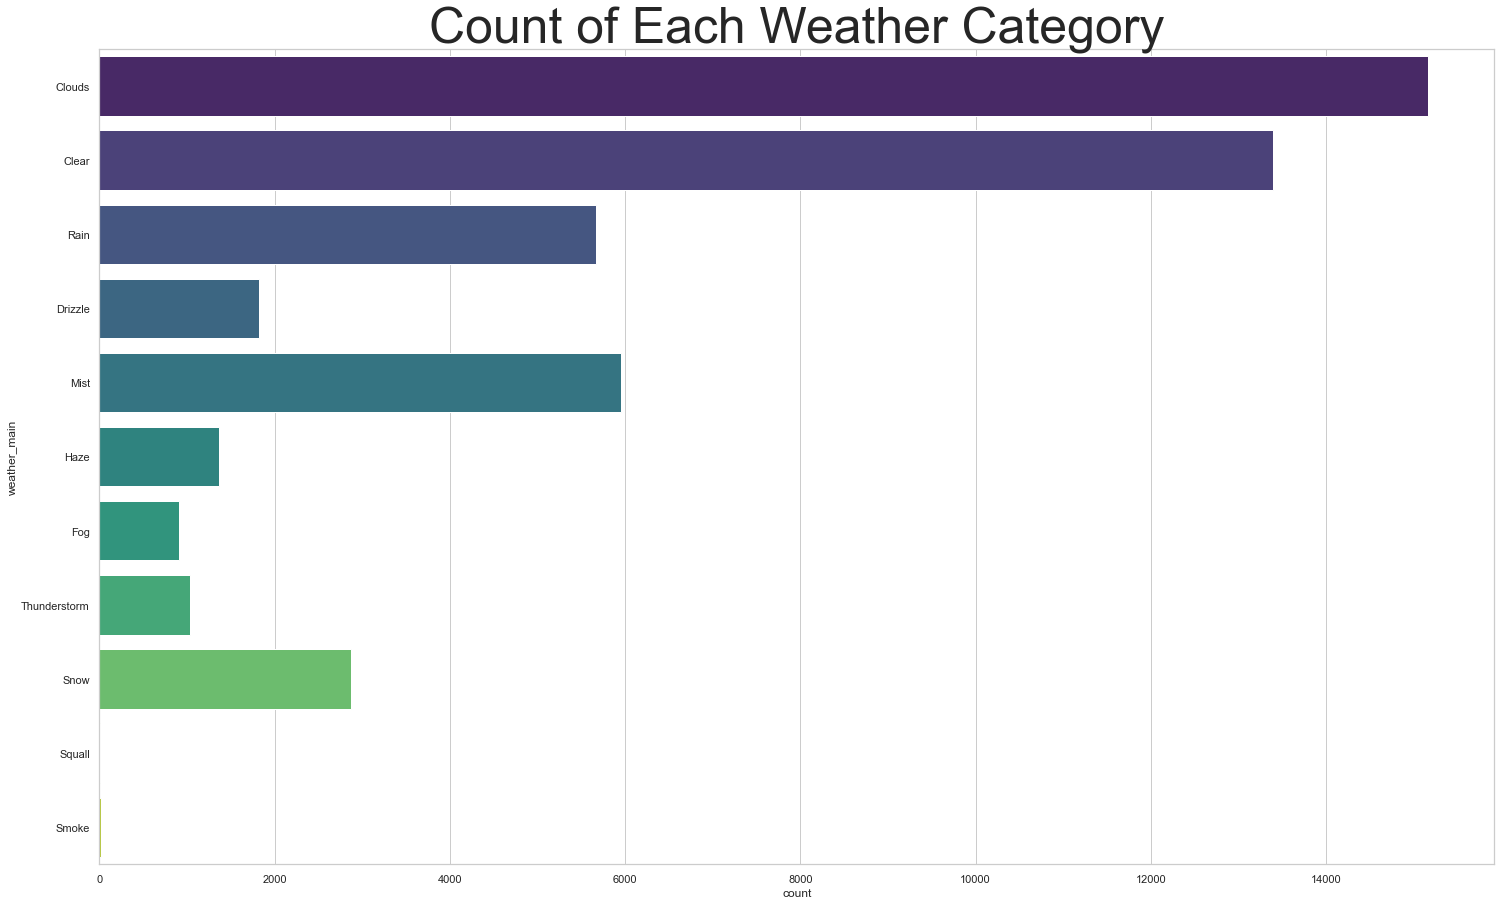

In [60]:
plt.figure(figsize=(25,15))
sns.countplot(y='weather_main', data=df, palette='viridis')
plt.title('Count of Each Weather Category', fontsize=50)
plt.show()

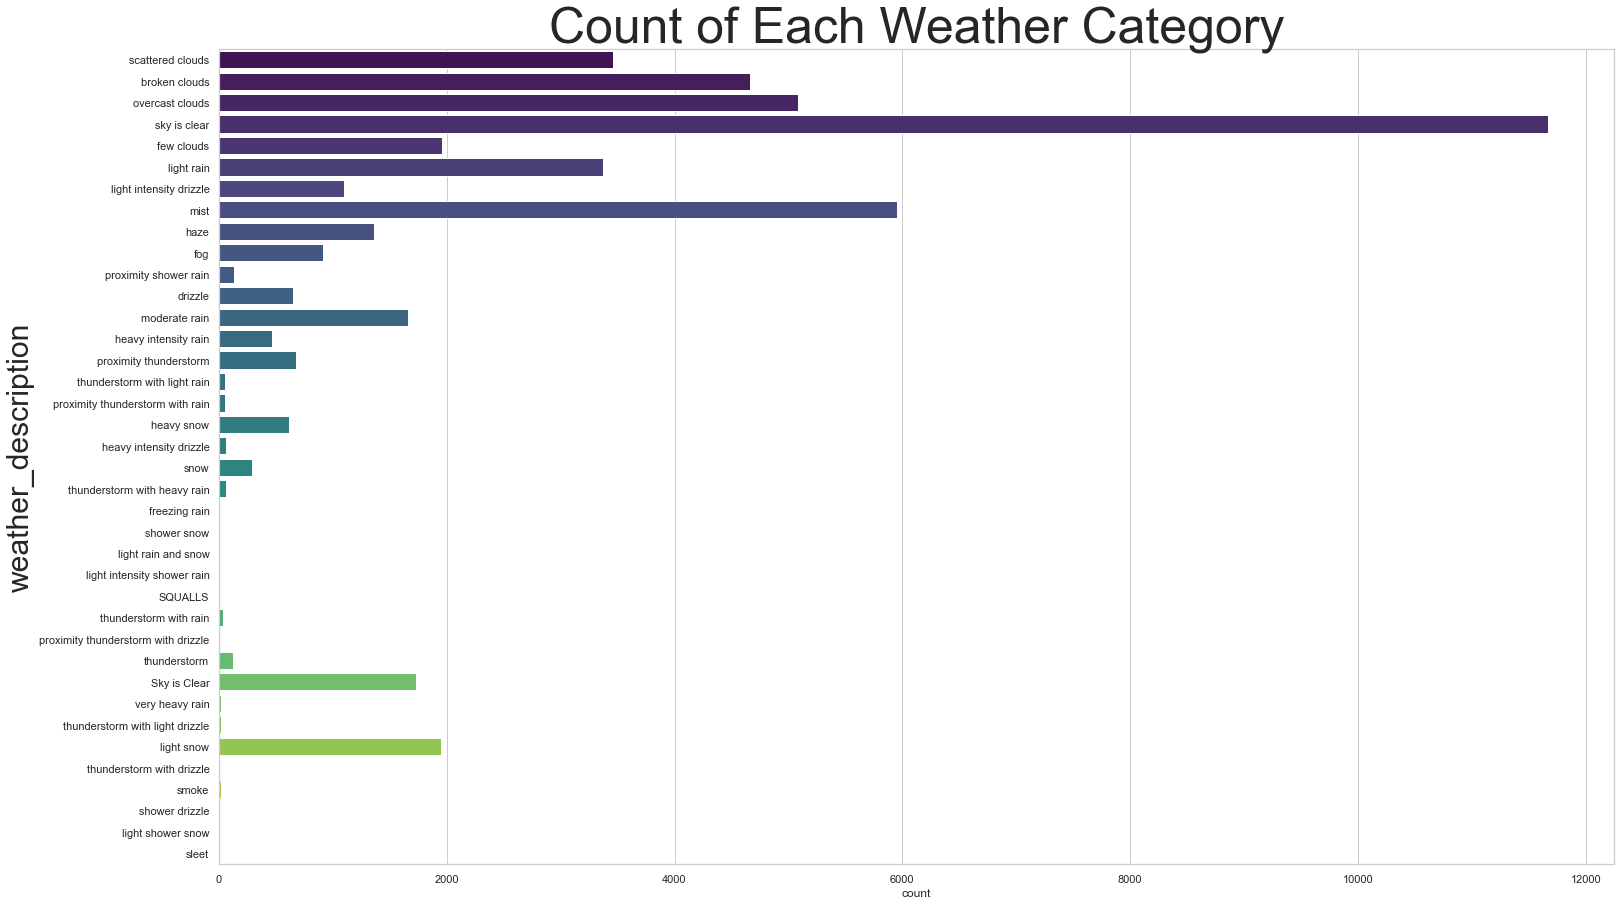

In [62]:
plt.figure(figsize=(25,15))
sns.countplot(y='weather_description', data=df, palette='viridis')
plt.title('Count of Each Weather Category', fontsize=50)
plt.ylabel("weather_description", fontsize=30)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes =="object":
        df[i]=le.fit_transform(df[i])
        
x=df.drop(columns=["traffic_volume"])
y=df["traffic_volume"
    ]

In [66]:
sc=StandardScaler()
x=sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
# Define the model with the best parameters
model = RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=300, random_state=42)

start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()

time_taken = end_time - start_time
print(f"Time taken to train the model: {time_taken} seconds")

predictions = model.predict(X_test)

Time taken to train the model: 26.011523008346558 seconds


In [70]:
#Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

#Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 655274.5270598694
Mean Absolute Error: 515.0660671437955
